In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from soteria import Soteria
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt
from keras.utils import to_categorical

soteria_engine = Soteria()

## Load Dataset

In [2]:
X, y = soteria_engine.load_dataset("data/features", "data/labels")

## Explore dataset

In [3]:
X.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454


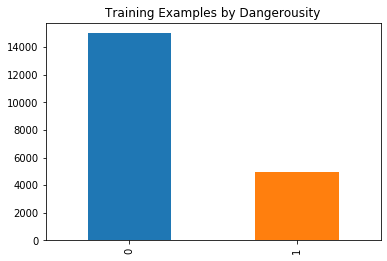

In [4]:
# Plot 
y['label'].value_counts().plot(kind='bar',title='Training Examples by Dangerousity')
plt.show()

### Add features
Distance = Speed * second

In [5]:
X = soteria_engine.add_features(X)

### Problem Definition
The problem is time-series classification since the data format is telemetric signal

In [6]:
def visualise_time_series(data,col_name, title):    
    data.plot()
    plt.xlabel('Time')
    plt.ylabel(col_name)
    plt.title(title)
    plt.show()   

In this chart, we will see that the speed of dangerous and safe trip is different in 120 seconds

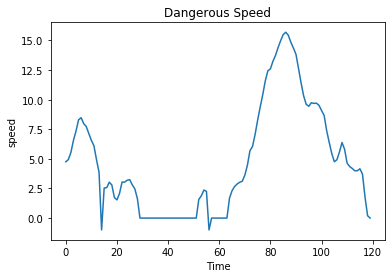

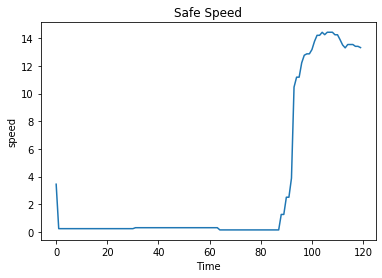

In [7]:
dangerous_trip_bid =y["bookingID"][y["label"]==1].values[0]
dangerous_trip = X[X["bookingID"]==dangerous_trip_bid].reset_index(drop=True)
safe_trip_bid =y["bookingID"][y["label"]==0].values[0]
safe_trip = X[X["bookingID"]==safe_trip_bid].reset_index(drop=True)
visualise_time_series(dangerous_trip["Speed"][0:120], "speed","Dangerous Speed")
visualise_time_series(safe_trip["Speed"][0:120],"speed", "Safe Speed")

In [8]:
#Cut off length
trip_length = X['bookingID'].value_counts()
trip_length.min()

120

Thus, in this problem, each trip is represented by 10 variables:
1. Accuracy
2. Bearing
3. acceleration_x
4. acceleration_y
5. acceleration_z
6. gyro_x
7. gyro_y
8. gyro_z
9. Speed
10. distance

which each variable consists of telemetric data in 120 seconds

![data_rep](https://github.com/dindanovitasari/soteria/blob/master/data_rep.PNG)

## Split dataset into train and test dataset

In [9]:
data_train, data_test, label_train, label_test = soteria_engine.train_test_split(X, y, 0.7)

#Cut off dataset
X_train, y_train = soteria_engine.cutoff_dataset(data_train, label_train)
X_test, y_test = soteria_engine.cutoff_dataset(data_test, label_test)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

## Build and Train Model

In [21]:
model = soteria_engine.generate_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 10, 120)      0                                            
__________________________________________________________________________________________________
permute_4 (Permute)             (None, 120, 10)      0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 120, 128)     10368       permute_4[0][0]                  
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 120, 128)     512         conv1d_10[0][0]                  
__________________________________________________________________________________________________
activation

In [22]:
model_tr = soteria_engine.train_model(model, X_train, y_train, "model/model_tr")

Train on 11189 samples, validate on 2798 samples
Epoch 1/50
11189/11189 [==============================] - 47s 4ms/step - loss: 0.5563 - jacek_auc: 0.7681 - val_loss: 0.5642 - val_jacek_auc: 0.7863

Epoch 00001: loss improved from inf to 0.55626, saving model to model/model_tr.h5
Epoch 2/50
11189/11189 [==============================] - 48s 4ms/step - loss: 0.5367 - jacek_auc: 0.7856 - val_loss: 0.5901 - val_jacek_auc: 0.7866

Epoch 00002: loss improved from 0.55626 to 0.53668, saving model to model/model_tr.h5
Epoch 3/50
11189/11189 [==============================] - 48s 4ms/step - loss: 0.5349 - jacek_auc: 0.7862 - val_loss: 0.5563 - val_jacek_auc: 0.7876

Epoch 00003: loss improved from 0.53668 to 0.53487, saving model to model/model_tr.h5
Epoch 4/50
11189/11189 [==============================] - 48s 4ms/step - loss: 0.5296 - jacek_auc: 0.7886 - val_loss: 0.5666 - val_jacek_auc: 0.7894

Epoch 00004: loss improved from 0.53487 to 0.52959, saving model to model/model_tr.h5
Epoch 5/50


11189/11189 [==============================] - 47s 4ms/step - loss: 0.5134 - jacek_auc: 0.7998 - val_loss: 0.5691 - val_jacek_auc: 0.7999

Epoch 00038: loss improved from 0.51372 to 0.51337, saving model to model/model_tr.h5
Epoch 39/50
11189/11189 [==============================] - 47s 4ms/step - loss: 0.5132 - jacek_auc: 0.8000 - val_loss: 0.5699 - val_jacek_auc: 0.8001

Epoch 00039: loss improved from 0.51337 to 0.51321, saving model to model/model_tr.h5
Epoch 40/50
11189/11189 [==============================] - 48s 4ms/step - loss: 0.5138 - jacek_auc: 0.8002 - val_loss: 0.5623 - val_jacek_auc: 0.8003

Epoch 00040: loss did not improve from 0.51321
Epoch 41/50
11189/11189 [==============================] - 47s 4ms/step - loss: 0.5124 - jacek_auc: 0.8005 - val_loss: 0.5619 - val_jacek_auc: 0.8006

Epoch 00041: loss improved from 0.51321 to 0.51238, saving model to model/model_tr.h5
Epoch 42/50
11189/11189 [==============================] - 47s 4ms/step - loss: 0.5119 - jacek_auc: 0.8

In [23]:
model_tr.save_weights("model/model_tr_weight.h5")

## Predict Train data

In [26]:
_, auc_train = model_tr.evaluate(X_train, to_categorical(y_train, soteria_engine.num_classes), 
                                       batch_size = soteria_engine.batch_size)
print("Jacek AUC train: {}".format(auc_train))

13987/13987 [==============================] - 22s 2ms/step
Jacek AUC train: 0.784394820896272


In [27]:
y_pred_train = model_tr.predict(X_train)
y_pred_train_prob = np.max(y_pred_train, axis=1)
print("sklearn AUC: {}".format(metrics.roc_auc_score(y_train, y_pred_train_prob)))

sklearn AUC: 0.37441113492178346


## Predict Test data

In [25]:
_, auc_test = model_tr.evaluate(X_test, to_categorical(y_test, soteria_engine.num_classes), 
                                                    batch_size = soteria_engine.batch_size)
print("Jacek AUC test: {}".format(auc_test))

5995/5995 [==============================] - 6s 1ms/step
Jacek AUC test: 0.7304478480380411


In [28]:
y_pred_test = model_tr.predict(X_test)
y_pred_test_prob = np.max(y_pred_test, axis=1)
print("sklearn AUC: {}".format(metrics.roc_auc_score(y_test, y_pred_test_prob)))

sklearn AUC: 0.4150596160506545
